In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

C:\Users\maary\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [5]:
def createDataFrame(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createDataFrame(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [13]:
test = pd.DataFrame()
test['image'], test['label'] = createDataFrame(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [14]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [16]:
from tqdm.notebook import tqdm

In [17]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [18]:
train_features = extract_features(train["image"])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\maary\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [19]:
test_features = extract_features(test["image"])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [20]:
x_train = train_features / 255.0
x_test = test_features / 255.0

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [24]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [26]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [27]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\maary\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 160s 701ms/step - accuracy: 0.2405 - loss: 1.8369 - val_accuracy: 0.2583 - val_loss: 1.8100
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 152s 673ms/step - accuracy: 0.2477 - loss: 1.8042 - val_accuracy: 0.2610 - val_loss: 1.7683
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 153s 676ms/step - accuracy: 0.2841 - loss: 1.7404 - val_accuracy: 0.3626 - val_loss: 1.6024
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 159s 705ms/step - accuracy: 0.3564 - loss: 1.6246 - val_accuracy: 0.4144 - val_loss: 1.4991
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 127s 561ms/step - accuracy: 0.4066 - loss: 1.5173 - val_accuracy: 0.4703 - val_loss: 1.3664
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 144s 639ms/step - accuracy: 0.4371 - loss: 1.4522 - val_accuracy: 0.4942 - val_loss: 1.3233
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 158s 699ms/step - accuracy: 0.4631 - loss: 1.4104 - val_accuracy: 0.5188 - val_loss: 1.2854
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 139s 616ms/step - accuracy: 

Epoch 50/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 173s 766ms/step - accuracy: 0.6305 - loss: 0.9869 - val_accuracy: 0.6185 - val_loss: 1.0404
Epoch 51/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 171s 757ms/step - accuracy: 0.6318 - loss: 0.9769 - val_accuracy: 0.6182 - val_loss: 1.0469
Epoch 52/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 171s 756ms/step - accuracy: 0.6312 - loss: 0.9770 - val_accuracy: 0.6240 - val_loss: 1.0349
Epoch 53/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 173s 767ms/step - accuracy: 0.6308 - loss: 0.9730 - val_accuracy: 0.6199 - val_loss: 1.0346
Epoch 54/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 173s 767ms/step - accuracy: 0.6426 - loss: 0.9542 - val_accuracy: 0.6272 - val_loss: 1.0355
Epoch 55/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 171s 755ms/step - accuracy: 0.6430 - loss: 0.9642 - val_accuracy: 0.6210 - val_loss: 1.0369
Epoch 56/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 760ms/step - accuracy: 0.6416 - loss: 0.9550 - val_accuracy: 0.6190 - val_loss: 1.0436
Epoch 57/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 172s 759ms/step - ac

Epoch 99/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 129s 569ms/step - accuracy: 0.7161 - loss: 0.7835 - val_accuracy: 0.6337 - val_loss: 1.0314
Epoch 100/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 126s 558ms/step - accuracy: 0.7072 - loss: 0.7929 - val_accuracy: 0.6282 - val_loss: 1.0289


In [32]:
model_json = model.to_json()
with open("facialemotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("facialemotiondetector.keras")

In [33]:
from keras.models import model_from_json

In [36]:
json_file = open("facialemotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotiondetector.h5")

In [37]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [38]:
def ef(image):
    img = load_img(image, grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

Original image expression is sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
model prediction is  sad


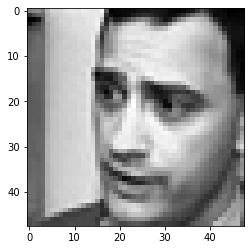

In [44]:
import matplotlib.pyplot as plt
image = 'images/train/sad/127.jpg'
print("Original image expression is sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap = "gray")